In [1]:
# Start Classification

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
# All sklearn datasets have a similar structure

In [7]:
X, y = mnist["data"], mnist["target"]
X.shape
y.shape

(70000,)

In [22]:
X.iloc[0]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 784, dtype: int64

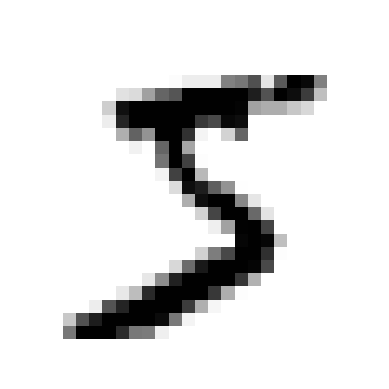

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[0].values
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [26]:
y.iloc[0]

'5'

In [27]:
# Here y is a string, ml algos expect numbers so, let's cast it into one

In [29]:
import numpy as np
y = y.astype(np.uint8)

In [30]:
y.iloc[0]

np.uint8(5)

In [31]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [33]:
# Designing a binary classifier for now which will detect the number 5, that's it

In [34]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [35]:
# Trying out the SGD Stochastic Gradient Descent Classifier

In [36]:
from sklearn.linear_model import SGDClassifier

In [37]:
sgd_clf = SGDClassifier()

In [38]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier()

In [41]:
sgd_clf.predict([some_digit])

C:\python-ml\myvvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [42]:
# Evaluating a classifier is trickier than evaluating a regressor

In [43]:
# Cross Validation